In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [178]:
df1 = pd.read_csv('daily_sales_1002.csv', encoding='ISO-8859-1', dtype={'article':'str','article_text':'str', 'sales_profit': 'float'})
df1

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost
0,20210108,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.0,1184.0,362.53
1,20201209,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.0,26160.0,13513.41
2,20210427,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.0,11040.0,4777.22
3,20210702,000000000002508340,BM FAGERSTA 70x120cm black,1002,36.16,SEK,1.0,80.0,43.84
4,20210616,000000000004921500,Storage box SMARTSTORE classic 45 w/lid,1002,5253.41,SEK,82.0,9734.4,4480.99
...,...,...,...,...,...,...,...,...,...
2544730,20210415,000000000001376890,DCS SANNE washed cotton SGL brown KR,1002,-142.68,SEK,-2.0,-280.0,-137.32
2544731,20210602,000000000003684301,Gaming chair HARLEV black,1002,3400.33,SEK,10.0,6000.0,2599.67
2544732,20210820,000000000003780480,Market parasol NAPPEDAM Ø250 dark grey,1002,-185.89,SEK,-1.0,-280.0,-94.11
2544733,20210123,000000000004900914,Wall clock ELVART Ø23cm black/white,1002,473.19,SEK,81.0,1296.0,822.81


In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   calendar_day           int64  
 1   article                object 
 2   article_text           object 
 3   sales_org              int64  
 4   sales_profit           float64
 5   sales_profit_currency  object 
 6   quantity               float64
 7   sales_excluding_tax    float64
 8   cost                   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 174.7+ MB


In [209]:
df1['calendar_day'] = pd.to_datetime(df1['calendar_day'], format='%Y%m%d')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   calendar_day           datetime64[ns]
 1   article                object        
 2   article_text           object        
 3   sales_org              int64         
 4   sales_profit           float64       
 5   sales_profit_currency  object        
 6   quantity               float64       
 7   sales_excluding_tax    float64       
 8   cost                   float64       
 9   month                  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 194.1+ MB


## Which are the most selling products?

In [187]:
boughts = df1.groupby('article_text').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:15]
boughts

,quantity
article_text,
Transport,553997.0
Bag large 60my JYSK,381245.0
PIL 650g KUNNA 50x60cm,355030.0
Sack large JYSK 50% recycle,254534.0
PIL 650g Varnamo KEISAREN 50x60cm,237994.0
Bag MY BLUE BAG W18xL70xH60cm recycled,228460.0
PIL 500g ROYAL NORDIC 50x60cm,219110.0
PIL 400g NORDKAPP 50x60cm,200717.0
PIL 800g Høie DOWNFEEL 50x60cm,191971.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Transport'),
  Text(1, 0, 'Bag large 60my JYSK'),
  Text(2, 0, 'PIL 650g KUNNA 50x60cm'),
  Text(3, 0, 'Sack large JYSK 50% recycle'),
  Text(4, 0, 'PIL 650g Varnamo KEISAREN 50x60cm'),
  Text(5, 0, 'Bag MY BLUE BAG W18xL70xH60cm recycled'),
  Text(6, 0, 'PIL 500g ROYAL NORDIC 50x60cm'),
  Text(7, 0, 'PIL 400g NORDKAPP 50x60cm'),
  Text(8, 0, 'PIL 800g Høie DOWNFEEL 50x60cm'),
  Text(9, 0, 'Invoice payment'),
  Text(10, 0, 'PIL 400g BREIDTINDEN fibre 50x60cm'),
  Text(11, 0, 'Bag medium JYSK 50% recycle'),
  Text(12, 0, 'Stacking basket HALVARD 10x20x5 ass.'),
  Text(13, 0, 'Batteries WILMER AA 10pcs/pk SDP'),
  Text(14, 0, 'DUV 800g KUNNA warm 150x200cm')])

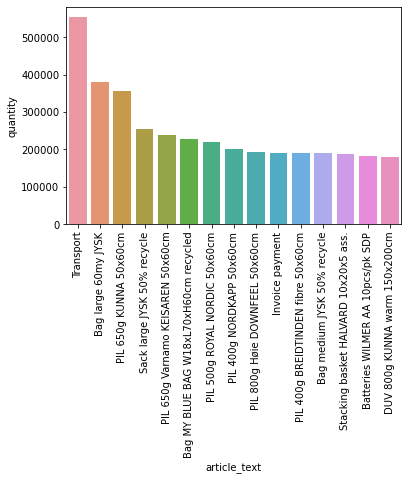

In [188]:
sns.barplot(x='article_text',y='quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

## Which are the Top 10 products by sales?

In [191]:
productSales = pd.DataFrame(df1.groupby('article_text').sum()['sales_excluding_tax'])
productSales.sort_values(by=['sales_excluding_tax'], inplace=True, ascending=False)
productSales.head(10)

,sales_excluding_tax
article_text,
Lounge set ULLEHUSE 6 pers. black,58866498.00
Transport,37049576.68
Lounge set TAMBOHUSE 5 pers. grey,37009092.18
Sofa bed chaiselongue VEJLBY dark grey,33888022.30
Lounge set VONGE 5 pers. black,32942864.73
PIL 800g Høie DOWNFEEL 50x60cm,30777806.15
PIL 650g Varnamo KEISAREN 50x60cm,28766862.32
DUV 7 kg CURA PEARL 150x210cm,25621400.36
TM 180x200cm GOLD T65 white/light grey,25329457.31


## Which are the most profitable products?

In [193]:
profitable_products = pd.DataFrame(df1.groupby(['article_text']).sum()['sales_profit'])
profitable_products.sort_values(by=['sales_profit'], inplace = True, ascending = False)
profitable_products.head(10)

,sales_profit
article_text,
Transport,37048866.68
Lounge set ULLEHUSE 6 pers. black,28337004.59
PIL 650g Varnamo KEISAREN 50x60cm,19458928.03
Lounge set VONGE 5 pers. black,19444980.56
Lounge set TAMBOHUSE 5 pers. grey,18726588.70
TM 180x200cm GOLD T65 white/light grey,18500787.61
PIL 800g Høie DOWNFEEL 50x60cm,18436037.53
TM 180x200cm GOLD T110 WELLPUR,16916073.64
TM 90x200cm GOLD T65 white/light grey,15916647.39


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Transport'),
  Text(1, 0, 'Lounge set ULLEHUSE 6 pers. black'),
  Text(2, 0, 'PIL 650g Varnamo KEISAREN 50x60cm'),
  Text(3, 0, 'Lounge set VONGE 5 pers. black'),
  Text(4, 0, 'Lounge set TAMBOHUSE 5 pers. grey'),
  Text(5, 0, 'TM 180x200cm GOLD T65 white/light grey'),
  Text(6, 0, 'PIL 800g Høie DOWNFEEL 50x60cm'),
  Text(7, 0, 'TM 180x200cm GOLD T110 WELLPUR'),
  Text(8, 0, 'TM 90x200cm GOLD T65 white/light grey'),
  Text(9, 0, 'Stacking chair GUDHJEM black')])

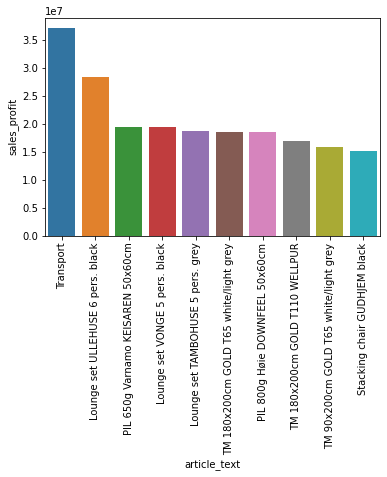

In [195]:
sns.barplot(x='article_text',y='sales_profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

In [200]:
df1['calendar_day'] = pd.to_datetime(df1['calendar_day'], format='%Y%m%d')

In [201]:
df1['calendar_day']

0         2021-01-08
1         2020-12-09
2         2021-04-27
3         2021-07-02
4         2021-06-16
             ...    
2544730   2021-04-15
2544731   2021-06-02
2544732   2021-08-20
2544733   2021-01-23
2544734   2021-01-05
Name: calendar_day, Length: 2544735, dtype: datetime64[ns]

In [203]:
df1['month'] = pd.DatetimeIndex(df1['calendar_day']).month

In [204]:
df1.head(50)

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
0,2021-01-08,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.00,1184.00,362.53,1
1,2020-12-09,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.00,26160.00,13513.41,12
2,2021-04-27,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.00,11040.00,4777.22,4
3,2021-07-02,000000000002508340,BM FAGERSTA 70x120cm black,1002,36.16,SEK,1.00,80.00,43.84,7
4,2021-06-16,000000000004921500,Storage box SMARTSTORE classic 45 w/lid,1002,5253.41,SEK,82.00,9734.40,4480.99,6
5,2021-08-24,000000000001734990,PM ULLVIER 33x42 flowerprint ass. SDP,1002,396.18,SEK,69.00,552.00,155.82,8
6,2021-08-27,000000000001954700,Vacuum compression bag SUNE 3pcs,1002,846.29,SEK,18.00,1003.52,157.23,8
7,2021-06-16,000000000003780395,Sun lounger BAGMARKEN W70xL200 hardwood,1002,0.00,SEK,0.00,0.00,0.00,6
8,2020-06-18,000000000003683441,Dining chair KOKKEDAL grey/oak,1002,0.00,SEK,0.00,0.00,0.00,6
9,2020-02-20,000000000005697422,VIN LIMURT 140cm small dots purple,1002,417.55,SEK,7.35,499.51,81.96,2


## Total sales values by month

In [206]:
date = df1.groupby(['month']).sum()
date

,sales_org,sales_profit,quantity,sales_excluding_tax,cost
month,,,,,
1,219593310,2.843681e+08,3736215.02,5.278959e+08,2.435278e+08
2,205471122,2.338894e+08,2655589.02,4.080307e+08,1.741413e+08
3,236896848,3.472077e+08,3833185.91,6.225441e+08,2.753365e+08
4,232916904,4.284362e+08,4276843.44,7.672379e+08,3.388017e+08
5,241953942,4.779493e+08,4683091.31,8.395753e+08,3.616259e+08
6,227858808,4.666221e+08,5054365.51,8.253037e+08,3.586816e+08
7,241736508,4.234039e+08,5038841.18,7.471333e+08,3.237294e+08
8,241556148,3.587883e+08,4369065.54,6.553033e+08,2.965149e+08
9,229161408,3.396590e+08,4120314.07,6.002326e+08,2.605736e+08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

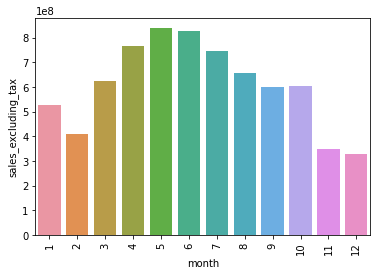

In [207]:
sns.barplot(x='month',y='sales_excluding_tax',data=date.reset_index())
plt.xticks(rotation = 'vertical')

In [79]:
df_filtered = df1.drop(columns = ['article','sales_org','sales_profit_currency','sales_excluding_tax'])

In [80]:
df_filtered.head(50)

,calendar_day,article_text,sales_profit,quantity,cost,Month
0,2021-01-08,SHE Terry 105x200x40cm grey KRONBORG,821.47,8.00,362.53,1
1,2020-12-09,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,12646.59,9.00,13513.41,12
2,2021-04-27,MA 80x200cm PLUS F65 DREAMZONE,6262.78,12.00,4777.22,4
3,2021-07-02,BM FAGERSTA 70x120cm black,36.16,1.00,43.84,7
4,2021-06-16,Storage box SMARTSTORE classic 45 w/lid,5253.41,82.00,4480.99,6
5,2021-08-24,PM ULLVIER 33x42 flowerprint ass. SDP,396.18,69.00,155.82,8
6,2021-08-27,Vacuum compression bag SUNE 3pcs,846.29,18.00,157.23,8
7,2021-06-16,Sun lounger BAGMARKEN W70xL200 hardwood,0.00,0.00,0.00,6
8,2020-06-18,Dining chair KOKKEDAL grey/oak,0.00,0.00,0.00,6
9,2020-02-20,VIN LIMURT 140cm small dots purple,417.55,7.35,81.96,2
